# SENTIMENT ANALYSIS

### IMPORTING LIBRARIES

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING THE DATASET

In [61]:
df = pd.read_csv('apps.csv')

In [62]:
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [63]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [64]:
df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [66]:
df.isnull()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9655,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9656,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9657,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [67]:
df.describe()

,Unnamed: 0,Rating,Reviews
count,9659.000000,8196.000000,9.659000e+03
mean,5666.172896,4.173243,2.165926e+05
std,3102.362863,0.536625,1.831320e+06
min,0.000000,1.000000,0.000000e+00
25%,3111.500000,4.000000,2.500000e+01
50%,5814.000000,4.300000,9.670000e+02
75%,8327.500000,4.500000,2.940100e+04
max,10840.000000,5.000000,7.815831e+07


### Step 1: Data Preprocessing

In [68]:
# Selecting 'Reviews' column for text analysis
# Converting 'Reviews' to numeric and handling missing values
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df = df.dropna(subset=['Reviews'])  # Drop rows with missing Reviews

# Converting 'Reviews' to string for text processing
df['Reviews'] = df['Reviews'].astype(str)


In [69]:
# Generating dummy sentiment labels (for demonstration)
# Feel free to replace this with actual sentiment labels if available
np.random.seed(42)
df['sentiment'] = np.random.choice(['positive', 'negative', 'neutral'], size=len(df))


### Step 2: Feature Engineering

In [70]:
# Clean the text in the 'Reviews' column
df['cleaned_text'] = df['Reviews'].str.replace(r'[^\w\s]', '', regex=True).str.lower()


In [71]:
# Using TF-IDF for feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
# Labels
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Machine Learning Models

In [72]:
# Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [73]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)


### Step 4: Evaluation

In [74]:
# SVM Evaluation
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("SVM Accuracy Score:", accuracy_score(y_test, svm_predictions))


SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.34      0.78      0.47       662
     neutral       0.35      0.11      0.16       630
    positive       0.28      0.09      0.14       640

    accuracy                           0.33      1932
   macro avg       0.32      0.33      0.26      1932
weighted avg       0.32      0.33      0.26      1932

SVM Accuracy Score: 0.33281573498964806


In [75]:
# Naive Bayes Evaluation
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("Naive Bayes Accuracy Score:", accuracy_score(y_test, nb_predictions))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.35      0.08      0.14       662
     neutral       0.35      0.11      0.16       630
    positive       0.33      0.82      0.47       640

    accuracy                           0.34      1932
   macro avg       0.34      0.34      0.26      1932
weighted avg       0.34      0.34      0.26      1932

Naive Bayes Accuracy Score: 0.3364389233954451


### Step 5: Data Visualization

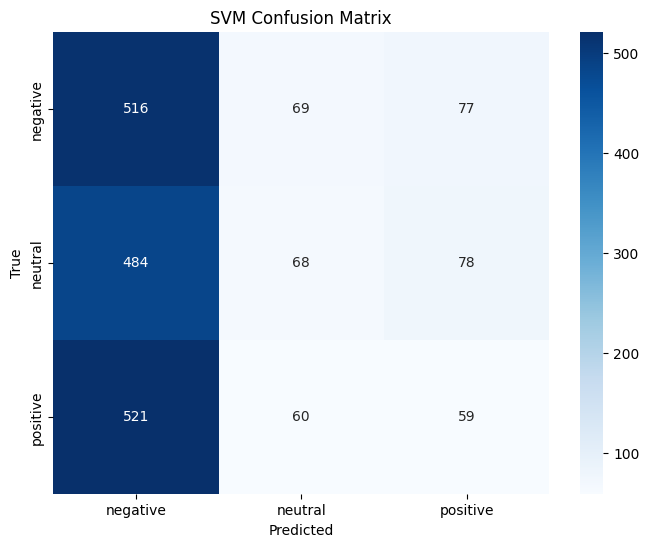

In [76]:
# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

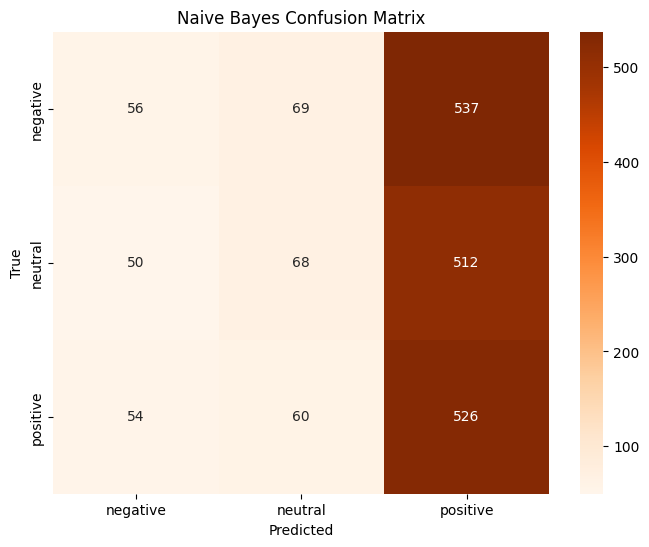

In [77]:
# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/tmp/ipykernel_32309/3503184462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


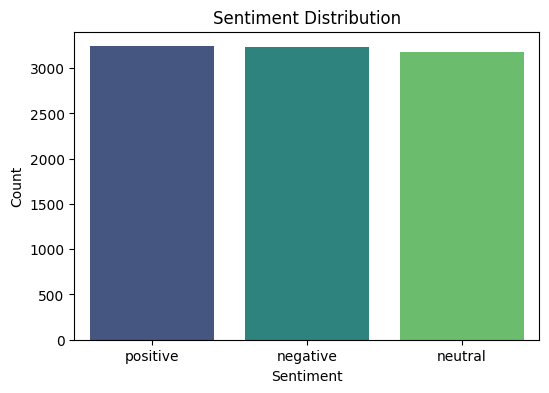

In [78]:
# Sentiment distribution visualization
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()